Data from https://packages.revolutionanalytics.com/datasets/mortDefault.zip 
##### We can also use SMOTE

In [45]:
import numpy as np
import os as os

In [46]:
os.getcwd()

'C:\\Users\\ajaohri\\Desktop\\mortdefault'

In [47]:
os.chdir('C:\\Users\\ajaohri\\Desktop\\mortdefault')

In [48]:
os.listdir()

['Heat Map.png',
 'mortDefault.zip',
 'mortDefault2000.csv',
 'mortDefault2001.csv',
 'mortDefault2002.csv',
 'mortDefault2003.csv',
 'mortDefault2004.csv',
 'mortDefault2005.csv',
 'mortDefault2006.csv',
 'mortDefault2007.csv',
 'mortDefault2008.csv',
 'mortDefault2009.csv',
 'Mortgage Default.ipynb',
 'Mortgage Default.pdf',
 'Stationery Request form.xls']

In [49]:
type(os.listdir())


list

In [50]:
len(os.listdir())

15

In [51]:
a=os.listdir()

In [52]:
a[1]

'mortDefault.zip'

In [53]:
type(a[1])

str

In [54]:
a[1][:-4]

'mortDefault'

In [55]:
type(a[1][:-4])

str

# Reading all the dataframes

In [56]:
import pandas as pd
import os as os
import seaborn as sns

In [57]:
import dask.dataframe as dd
df = dd.read_csv('mortDefault*.csv')

In [58]:
type(df)

dask.dataframe.core.DataFrame

In [59]:
df = df.compute()


In [60]:
type(df)

pandas.core.frame.DataFrame

In [61]:
df.head()

,creditScore,houseAge,yearsEmploy,ccDebt,year,default
0,615,10,5,2818,2000,0
1,780,34,5,3575,2000,0
2,735,12,1,3184,2000,0
3,713,15,5,6236,2000,0
4,689,10,5,6817,2000,0


In [62]:
round(df.describe(), 2)

,creditScore,houseAge,yearsEmploy,ccDebt,year,default
count,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00
mean,700.04,20.00,5.00,5003.67,2004.50,0.00
std,50.00,7.65,2.01,1988.66,2.87,0.07
min,432.00,0.00,0.00,0.00,2000.00,0.00
25%,666.00,15.00,4.00,3651.00,2002.00,0.00
50%,700.00,20.00,5.00,5000.00,2004.50,0.00
75%,734.00,25.00,6.00,6349.00,2007.00,0.00
max,955.00,40.00,15.00,15566.00,2009.00,1.00


In [63]:
pd.value_counts(df.default)

0    9950445
1      49555
Name: default, dtype: int64

In [64]:
pd.value_counts(df.year)

2009    1000000
2008    1000000
2007    1000000
2006    1000000
2005    1000000
2004    1000000
2003    1000000
2002    1000000
2001    1000000
2000    1000000
Name: year, dtype: int64

In [65]:
pd.crosstab(df.year,df.default,margins='TRUE')

default,0,1,All
year,,,
2000,998969,1031,1000000
2001,996867,3133,1000000
2002,998818,1182,1000000
2003,999103,897,1000000
2004,999467,533,1000000
2005,999533,467,1000000
2006,999300,700,1000000
2007,997940,2060,1000000
2008,985189,14811,1000000


In [66]:
pd.crosstab(df.year,df.default).apply(lambda r: r/r.sum(), axis=1)

default,0,1
year,,
2000,0.998969,0.001031
2001,0.996867,0.003133
2002,0.998818,0.001182
2003,0.999103,0.000897
2004,0.999467,0.000533
2005,0.999533,0.000467
2006,0.999300,0.000700
2007,0.997940,0.002060
2008,0.985189,0.014811


In [67]:
cutgroup=pd.groupby(df,df.year)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  """Entry point for launching an IPython kernel.


In [68]:
cutgroup.creditScore.mean()


year
2000    700.010831
2001    700.012431
2002    699.995307
2003    700.085155
2004    699.993788
2005    700.097133
2006    700.039365
2007    700.092305
2008    700.092404
2009    699.963756
Name: creditScore, dtype: float64

In [69]:
cutgroup.houseAge.mean()


year
2000    20.002445
2001    19.999905
2002    19.998046
2003    20.015708
2004    19.999310
2005    19.998409
2006    19.988198
2007    20.011935
2008    19.993294
2009    20.000618
Name: houseAge, dtype: float64

In [70]:
cutgroup.yearsEmploy.mean()

year
2000    5.004967
2001    5.005778
2002    5.005144
2003    5.003071
2004    5.003776
2005    5.002872
2006    5.006105
2007    5.001984
2008    5.006477
2009    5.002597
Name: yearsEmploy, dtype: float64

In [71]:
cutgroup.ccDebt.mean()

year
2000    5005.090791
2001    5000.986526
2002    5005.441205
2003    5005.258709
2004    5002.812617
2005    5003.873686
2006    5003.031694
2007    5005.374889
2008    5000.503625
2009    5004.308067
Name: ccDebt, dtype: float64

In [72]:
100*cutgroup.default.mean()

year
2000    0.1031
2001    0.3133
2002    0.1182
2003    0.0897
2004    0.0533
2005    0.0467
2006    0.0700
2007    0.2060
2008    1.4811
2009    2.4741
Name: default, dtype: float64

In [73]:
d1=100*cutgroup.default.mean()
dc=cutgroup.ccDebt.mean()

In [74]:
type(d1)

pandas.core.series.Series

In [75]:
d1=pd.DataFrame(d1)

In [76]:
d1

,default
year,
2000,0.1031
2001,0.3133
2002,0.1182
2003,0.0897
2004,0.0533
2005,0.0467
2006,0.0700
2007,0.2060
2008,1.4811


In [77]:
d1.index


Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009], dtype='int64', name='year')

In [78]:
d1['Year'] = d1.index


In [79]:
d1.dtypes

default    float64
Year         int64
dtype: object

In [80]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

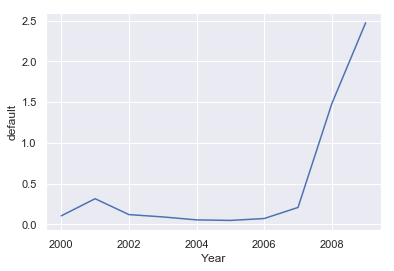

In [81]:
ax = sns.lineplot(x="Year", y="default", data=d1)

### Mortgage deafults rose sharply in 2007 and 2008 (which created the financial crisis)

In [82]:
cutgroup.houseAge.mean()

year
2000    20.002445
2001    19.999905
2002    19.998046
2003    20.015708
2004    19.999310
2005    19.998409
2006    19.988198
2007    20.011935
2008    19.993294
2009    20.000618
Name: houseAge, dtype: float64

In [83]:
type(cutgroup.houseAge.mean())

pandas.core.series.Series

In [84]:
d2=cutgroup.houseAge.mean()
d2=pd.DataFrame(d2)
d2['Year'] = d2.index
d2

,houseAge,Year
year,,
2000,20.002445,2000
2001,19.999905,2001
2002,19.998046,2002
2003,20.015708,2003
2004,19.999310,2004
2005,19.998409,2005
2006,19.988198,2006
2007,20.011935,2007
2008,19.993294,2008


In [85]:
dc=cutgroup.ccDebt.mean()
dc=pd.DataFrame(dc)
dc.mean

<bound method DataFrame.mean of            ccDebt
year             
2000  5005.090791
2001  5000.986526
2002  5005.441205
2003  5005.258709
2004  5002.812617
2005  5003.873686
2006  5003.031694
2007  5005.374889
2008  5000.503625
2009  5004.308067>

In [86]:
dc['Year'] = dc.index
dc

,ccDebt,Year
year,,
2000,5005.090791,2000
2001,5000.986526,2001
2002,5005.441205,2002
2003,5005.258709,2003
2004,5002.812617,2004
2005,5003.873686,2005
2006,5003.031694,2006
2007,5005.374889,2007
2008,5000.503625,2008


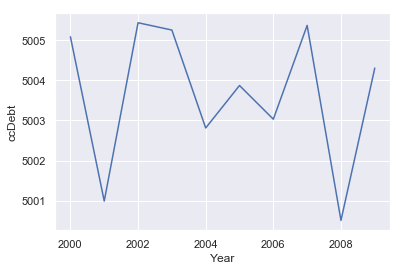

In [43]:
ax = sns.lineplot(x="Year", y="ccDebt", data=dc)

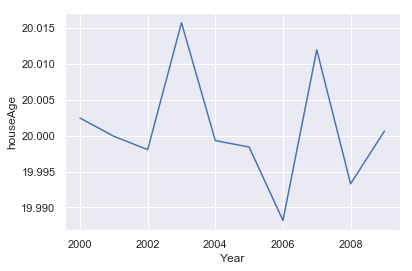

In [87]:
ax = sns.lineplot(x="Year", y="houseAge", data=d2)

In [88]:
d2007=df.loc[df['year'] == 2007]

In [89]:
d2007.corr()

,creditScore,houseAge,yearsEmploy,ccDebt,year,default
creditScore,1.000000,-0.000836,-0.000532,0.001242,NaN,-0.013980
houseAge,-0.000836,1.000000,0.000067,-0.002352,NaN,0.007848
yearsEmploy,-0.000532,0.000067,1.000000,0.000242,NaN,-0.021254
ccDebt,0.001242,-0.002352,0.000242,1.000000,NaN,0.111959
year,NaN,NaN,NaN,NaN,NaN,NaN
default,-0.013980,0.007848,-0.021254,0.111959,NaN,1.000000


In [90]:
d2009=df.loc[df['year'] == 2009]

In [91]:
d2007.ccDebt.describe()

count    1000000.000000
mean        5005.374889
std         1986.503172
min            0.000000
25%         3655.000000
50%         5003.000000
75%         6350.000000
max        14583.000000
Name: ccDebt, dtype: float64

In [92]:
d2009.ccDebt.describe()

count    1000000.000000
mean        5004.308067
std         1988.800433
min            0.000000
25%         3651.000000
50%         5003.000000
75%         6349.000000
max        14610.000000
Name: ccDebt, dtype: float64

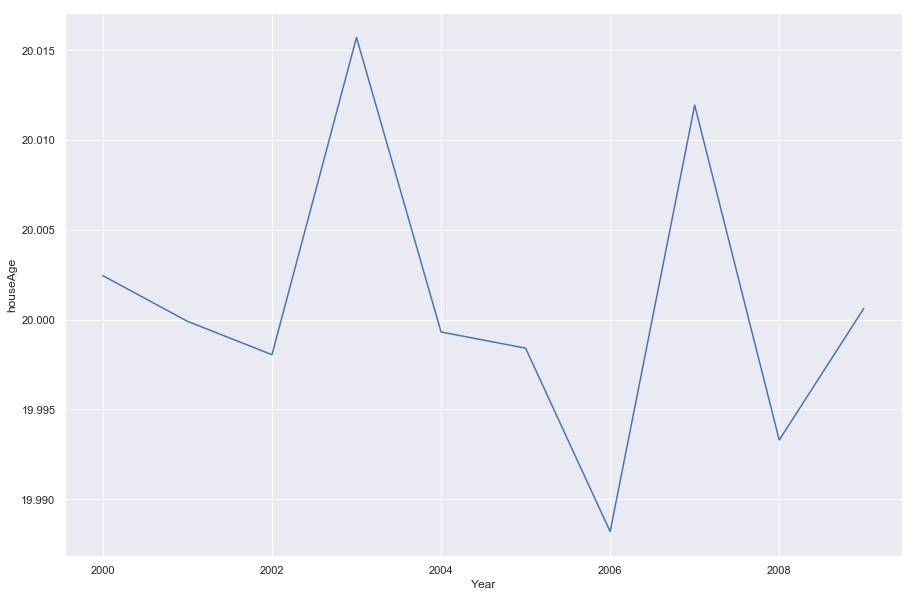

In [93]:
#Increasing Scale of visualization
fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,1,1)
ax = sns.lineplot(x="Year", y="houseAge", data=d2)

### House Age decreased in 2005, 2006 which means New Houses were built
(For constant houses House Age should have increased by 1 every year)

In [94]:
d3=cutgroup.creditScore.mean()
d3=pd.DataFrame(d3)
d3['Year'] = d3.index
d3

,creditScore,Year
year,,
2000,700.010831,2000
2001,700.012431,2001
2002,699.995307,2002
2003,700.085155,2003
2004,699.993788,2004
2005,700.097133,2005
2006,700.039365,2006
2007,700.092305,2007
2008,700.092404,2008


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


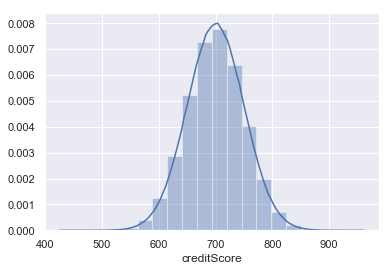

In [95]:
sns.distplot(df.creditScore, bins=20, kde=True, rug=False);

### Credit Scores follow a normal distribution over the years

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


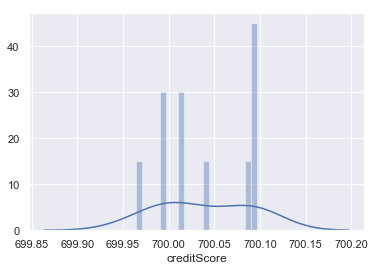

In [96]:
sns.distplot(d3.creditScore, bins=20, kde=True, rug=False);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


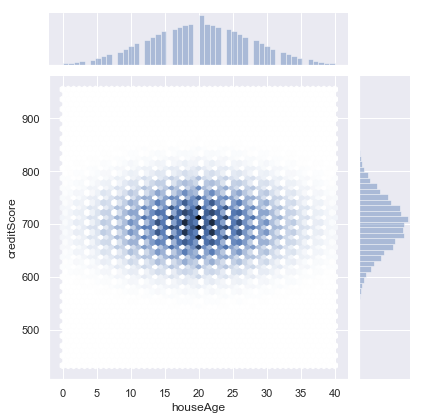

In [97]:
sns.jointplot('houseAge','creditScore',kind='hex',data=df)

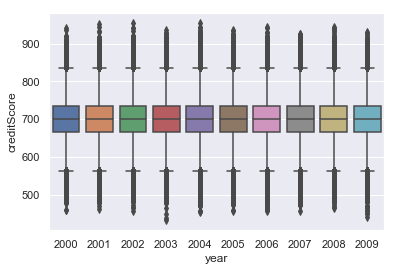

In [98]:

sns.boxplot(x="year", y="creditScore", data=df)

### Credit scores remained constant on an average

In [99]:
df.corr()

,creditScore,houseAge,yearsEmploy,ccDebt,year,default
creditScore,1.000000,0.000065,0.000205,-0.000268,0.000204,-0.017229
houseAge,0.000065,1.000000,0.000250,-0.000091,-0.000175,0.012147
yearsEmploy,0.000205,0.000250,1.000000,-0.000026,-0.000208,-0.028055
ccDebt,-0.000268,-0.000091,-0.000026,1.000000,-0.000143,0.141295
year,0.000204,-0.000175,-0.000208,-0.000143,1.000000,0.074090
default,-0.017229,0.012147,-0.028055,0.141295,0.074090,1.000000


### ccDebt shows higher corelation to default than anyone else as expected

In [100]:
df[df.columns.difference(['year'])].corr() #eliminating year from corelation matrix


,ccDebt,creditScore,default,houseAge,yearsEmploy
ccDebt,1.000000,-0.000268,0.141295,-0.000091,-0.000026
creditScore,-0.000268,1.000000,-0.017229,0.000065,0.000205
default,0.141295,-0.017229,1.000000,0.012147,-0.028055
houseAge,-0.000091,0.000065,0.012147,1.000000,0.000250
yearsEmploy,-0.000026,0.000205,-0.028055,0.000250,1.000000


In [101]:
dfcorr1=df[df.columns.difference(['year'])]
dfcorr1.head()

,ccDebt,creditScore,default,houseAge,yearsEmploy
0,2818,615,0,10,5
1,3575,780,0,34,5
2,3184,735,0,12,1
3,6236,713,0,15,5
4,6817,689,0,10,5


In [102]:
corrdata=df[df.columns.difference(['year'])].corr()


In [103]:
df.columns

Index(['creditScore', 'houseAge', 'yearsEmploy', 'ccDebt', 'year', 'default'], dtype='object')

In [104]:
list(df.columns.values) 


['creditScore', 'houseAge', 'yearsEmploy', 'ccDebt', 'year', 'default']

In [105]:
names=list(df.columns.values) 


In [106]:
type(names)

list

In [107]:
del names[4]

In [108]:
names

['creditScore', 'houseAge', 'yearsEmploy', 'ccDebt', 'default']

### plot correlation matrix using matplot

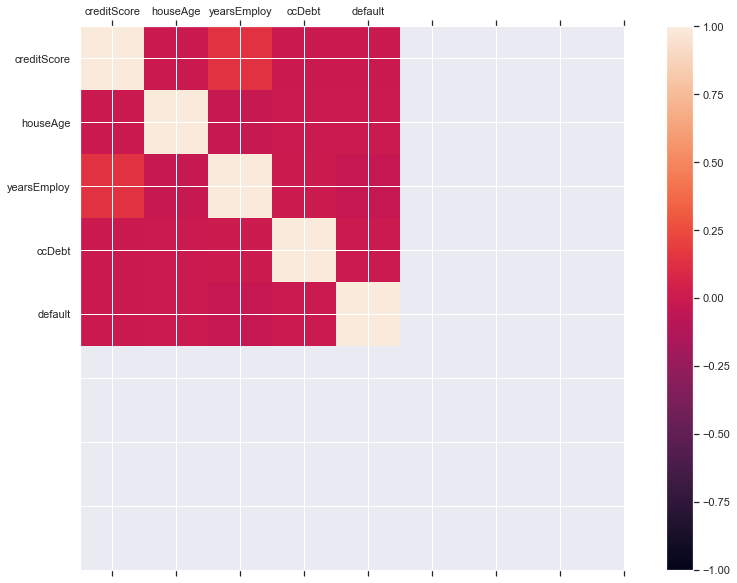

In [109]:
# plot correlation matrix
correlations = corrdata
 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()



### Using Seaborn
### Experimenting with Color pallettes

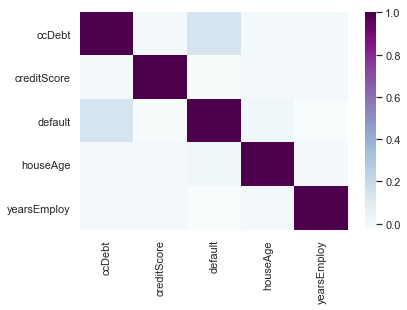

In [110]:

sns.heatmap(corrdata, cmap="BuPu")
plt.show()

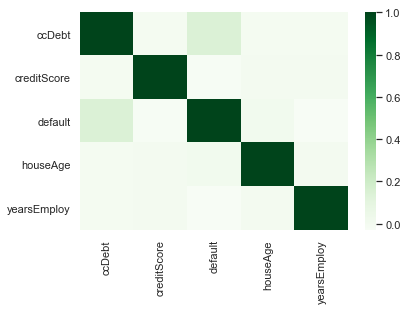

In [111]:
sns.heatmap(corrdata, cmap="Greens")
plt.savefig('Heat Map')
plt.show()


### Lets make a mortgage model for year 2001 using Linear Regression 

In [112]:
d2001=df.loc[df['year'] == 2001]


In [113]:
d2001.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
creditScore    1000000 non-null int64
houseAge       1000000 non-null int64
yearsEmploy    1000000 non-null int64
ccDebt         1000000 non-null int64
year           1000000 non-null int64
default        1000000 non-null int64
dtypes: int64(6)
memory usage: 53.4 MB


In [114]:
names

['creditScore', 'houseAge', 'yearsEmploy', 'ccDebt', 'default']

In [115]:
type(names)

list

In [116]:
names[4]

'default'

In [117]:
del names[4]

In [118]:
names

['creditScore', 'houseAge', 'yearsEmploy', 'ccDebt']

In [119]:
import statsmodels.formula.api as sm
result1 = sm.Logit(d2001['default'], d2001[names])
result1 = result1.fit()

Optimization terminated successfully.
         Current function value: 0.012171
         Iterations 12


In [120]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999996
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Sep 2018   Pseudo R-squ.:                  0.4257
Time:                        11:45:55   Log-Likelihood:                -12171.
converged:                       True   LL-Null:                       -21192.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
creditScore    -0.0208      0.000   -108.806      0.000      -0.021      -0.020
houseAge        0.0182      0.002      7.333      0.000       0.013       0.023
yearsEmploy    -0.3441      0.010    -34.644      0.000      -0.364      -0.325
ccDebt          0.0013   1.29e-05    101.186      0.000       0.001       0.001
===============================================================================

Possibly complete quasi-separation: A fraction 0.53 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [121]:
#lets compare this with 2007

In [122]:
d2007=df.loc[df['year'] == 2007]

import statsmodels.formula.api as sm
result = sm.Logit(d2007['default'], d2007[names])
result = result.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.008376
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999996
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Sep 2018   Pseudo R-squ.:                  0.4340
Time:                        11:46:09   Log-Likelihood:                -8376.3
converged:                       True   LL-Null:                       -14799.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
creditScore    -0.0220      0.000    -92.422      0.000      -0.022      -0.022
houseAge        0.0093      0.003      3.064      0.002       0.003       0.015
yearsEmploy    -0.3383      0.012    -27.768      0.000      -0.362      -0.314
ccDebt          0.0013   1.58e-05     85.604      0.000       0.001       0.001
===============================================================================

Possibly complete quasi-separation: A fraction 0.62 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [123]:
type(result)

statsmodels.discrete.discrete_model.BinaryResultsWrapper

In [124]:
#finding what all options we have with this object
dir(result)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_endog_name',
 '_get_robustcov_results',
 'aic',
 'bic',
 'bse',
 'conf_int',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'f_test',
 'fittedvalues',
 'get_margeff',
 'initialize',
 'k_constant',
 'llf',
 'llnull',
 'llr',
 'llr_pvalue',
 'load',
 'mle_retvals',
 'mle_settings',
 'model',
 'nobs',
 'normalized_cov_params',
 'params',
 'pred_table',
 'predict',
 'prsquared',
 'pvalues',
 'remove_data',
 'resid_dev',
 'resid_generalized',
 'resid_pearson',
 'resid_response',
 'save',
 'scale',
 'set_null_options',
 'summary',
 'summary2',
 't_test',
 't_

In [125]:
result.params

creditScore   -0.021990
houseAge       0.009320
yearsEmploy   -0.338274
ccDebt         0.001350
dtype: float64

In [126]:
result1.params

creditScore   -0.020830
houseAge       0.018242
yearsEmploy   -0.344125
ccDebt         0.001302
dtype: float64

In [127]:
#seeking help on a particular object or function
help(result.predict)

Help on method predict in module statsmodels.base.model:

predict(exog=None, transform=True, *args, **kwargs) method of statsmodels.discrete.discrete_model.LogitResults instance
    Call self.model.predict with self.params as the first argument.
    
    Parameters
    ----------
    exog : array-like, optional
        The values for which you want to predict. see Notes below.
    transform : bool, optional
        If the model was fit via a formula, do you want to pass
        exog through the formula. Default is True. E.g., if you fit
        a model y ~ log(x1) + log(x2), and transform is True, then
        you can pass a data structure that contains x1 and x2 in
        their original form. Otherwise, you'd need to log the data
        first.
    args, kwargs :
        Some models can take additional arguments or keywords, see the
        predict method of the model for the details.
    
    Returns
    -------
    prediction : ndarray, pandas.Series or pandas.DataFrame
        See

### Lets compare this with 2007 data

In [128]:
y_pred = result1.predict(d2001[names])

In [129]:
y_pred.head()

0    0.000068
1    0.001156
2    0.000983
3    0.000014
4    0.002481
dtype: float64

In [130]:
type(y_pred)

pandas.core.series.Series

In [131]:
y_pred=pd.DataFrame(y_pred)

In [132]:
y_pred.columns 


RangeIndex(start=0, stop=1, step=1)

In [133]:
y_pred.head()

,0
0,0.000068
1,0.001156
2,0.000983
3,0.000014
4,0.002481


In [134]:
type(y_pred)

pandas.core.frame.DataFrame

In [135]:
y_pred.columns=['default']

In [136]:
y_pred.head()

,default
0,0.000068
1,0.001156
2,0.000983
3,0.000014
4,0.002481


In [137]:
y_pred['pred_default'] = np.where(y_pred['default']>=0.5, 1, 0)


In [138]:
y_pred.head()

,default,pred_default
0,0.000068,0
1,0.001156,0
2,0.000983,0
3,0.000014,0
4,0.002481,0


In [139]:
y_pred['pred_default'].value_counts()

0    999436
1       564
Name: pred_default, dtype: int64

In [140]:
d2007['default'].value_counts()

0    997940
1      2060
Name: default, dtype: int64

In [141]:
y_pred['2007_default']=d2007['default']

In [142]:
y_pred.head()

,default,pred_default,2007_default
0,0.000068,0,0
1,0.001156,0,0
2,0.000983,0,0
3,0.000014,0,0
4,0.002481,0,0


In [143]:
pd.crosstab(y_pred['pred_default'],y_pred['2007_default'])

2007_default,0,1
pred_default,,
0,997377,2059
1,563,1


In [144]:
! pip install -U scikit-learn --user

Requirement already up-to-date: scikit-learn in c:\programdata\anaconda3\lib\site-packages (0.19.2)


In [145]:
import sklearn

In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred['2007_default'], y_pred['pred_default'], labels=None, sample_weight=None)

array([[997377,    563],
       [  2059,      1]], dtype=int64)

In [147]:
tn, fp, fn, tp = confusion_matrix(y_pred['2007_default'], y_pred['pred_default']).ravel()


In [148]:
(tn, fp, fn, tp)

(997377, 563, 2059, 1)

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred['2007_default'], y_pred['pred_default'])

0.997378

In [150]:
Accuracy=(tp+tn)/(tp+fp+tn+fn) 
Accuracy

0.997378

In [151]:
MisclassicationRate=(fp+fn)/(tp+fp+tn+fn) 
MisclassicationRate

0.002622

In [152]:
MisclassicationRate=1-Accuracy
MisclassicationRate

0.002622000000000013

In [153]:
#true_positive_rate
tpr=tp/(2065+1)
tpr

0.000484027105517909

In [154]:
#false_positive_rate
fpr=fp/(tp+fp+tn+fn) 
fpr

0.000563

In [155]:
Specificity=tn/(tp+fp+tn+fn) 
Specificity

0.997377

In [156]:
Precision=tp/(563+1)
Precision

0.0017730496453900709

In [157]:
Prevalence=564/(tp+fp+tn+fn) 
Prevalence

0.000564

In [158]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred['2007_default'], y_pred['pred_default'])

NameError: name 'metrics' is not defined

In [ ]:
fpr,tpr,thresholds

#### These values are the same as calculated manually

In [ ]:
auc = metrics.roc_auc_score(y_pred['2007_default'],  y_pred['pred_default'])
auc

In [ ]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### low AUC ROC vs high f1 or other "point" metric, means that your classifier currently does a decent job,
however for many other values of threshold - it is pretty baduc

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#### So we see the model does deteriorate over time

Lets try to predict 2000 defaults  from 2001 model and 
2007 defaults from 2006 models but using more modeling algorithms

In [161]:
type(d2001)

pandas.core.frame.DataFrame

In [162]:
d2001.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
creditScore    1000000 non-null int64
houseAge       1000000 non-null int64
yearsEmploy    1000000 non-null int64
ccDebt         1000000 non-null int64
year           1000000 non-null int64
default        1000000 non-null int64
dtypes: int64(6)
memory usage: 53.4 MB


In [163]:
del d2001['year']

In [164]:
names

['creditScore', 'houseAge', 'yearsEmploy', 'ccDebt']

In [165]:
d2001.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
creditScore    1000000 non-null int64
houseAge       1000000 non-null int64
yearsEmploy    1000000 non-null int64
ccDebt         1000000 non-null int64
default        1000000 non-null int64
dtypes: int64(5)
memory usage: 45.8 MB


In [166]:
from sklearn.model_selection import train_test_split


In [167]:
y=d2001.default #dependent variable

In [168]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(d2001[names], y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(700000, 4) (700000,)
(300000, 4) (300000,)


In [169]:
from sklearn.linear_model import LogisticRegression


In [170]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:

predictions = logreg.predict(X_test)

In [172]:
print(logreg.score(X_test, y_test))


0.9969133333333333


### Thats a really good model. But our basic assumption remains that each row deals with one unique customer

In [173]:
dir(logreg)


['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

In [174]:
logreg.coef_

array([[-0.02091427,  0.01915492, -0.3218857 ,  0.00129987]])

In [175]:
d2002=df.loc[df['year'] == 2002]

In [176]:
import statsmodels.formula.api as sm
result = sm.Logit(d2001['default'], d2001[names])
result = result.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.012171
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999996
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Sep 2018   Pseudo R-squ.:                  0.4257
Time:                        11:48:05   Log-Likelihood:                -12171.
converged:                       True   LL-Null:                       -21192.
                                        LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
creditScore    -0.0208      0.000   -108.806      0.000      -0.021      -0.020
houseAge        0.0182      0.002      7.333      0.000       0.013       0.023
yearsEmploy    -0.3441      0.010    -34.644      0.000      -0.364      -0.325
ccDebt          0.0013   1.29e-05    101.186      0.000       0.001       0.001
===============================================================================

Possibly complete quasi-separation: A fraction 0.53 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [177]:
#Now for 2002 data

predictions = result.predict(d2002[names])
print(logreg.score(d2002[names], d2002['default']))


0.998606


In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix(d2001['default'], d2002['default'], labels=None, sample_weight=None)

array([[995690,   1177],
       [  3128,      5]], dtype=int64)

In [179]:
from sklearn.metrics import accuracy_score
accuracy_score(d2002['default'], d2001['default'])

0.995695

In [181]:
auc = sklearn.metrics.roc_auc_score(d2002['default'], d2001['default'])
auc

0.5005492083859705

###  'Even though model scores were pretty stable the rise in defaults surprised many analysts. This was partly due to a glut in number of houses (partially seen here by age of houses remaing stable or even decreasing even though they should increase) as well as interest rates on mortgages (not clearly provided here) or average income of customers.'